In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import csv
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv('/kaggle/input/ppcu-data-mining-and-machine-learning-2022/X_train.csv')
x_test = pd.read_csv('/kaggle/input/ppcu-data-mining-and-machine-learning-2022/X_test.csv');
y_train = pd.read_csv('/kaggle/input/ppcu-data-mining-and-machine-learning-2022/y_train.csv')

In [3]:
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39900 entries, 0 to 39899
Columns: 171 entries, Id to eg_000
dtypes: float64(169), int64(2)
memory usage: 52.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Columns: 171 entries, Id to eg_000
dtypes: float64(169), int64(2)
memory usage: 22.3 MB


In [4]:
x_train.head()

,Id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,21470,0.0,2.130706e+09,168.0,0.0,0.0,0.0,0.0,0.0,...,187028.0,109090.0,228040.0,89664.0,296964.0,78936.0,58.0,0.0,0.0,0.0
1,1,40856,NaN,5.540000e+02,0.0,0.0,0.0,0.0,0.0,0.0,...,526386.0,277000.0,612436.0,441664.0,84968.0,2204.0,78.0,0.0,0.0,0.0
2,2,28,NaN,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,...,406.0,80.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,38682,NaN,3.440000e+02,326.0,0.0,0.0,0.0,0.0,0.0,...,244622.0,116794.0,267896.0,307242.0,248998.0,164098.0,300820.0,11238.0,0.0,0.0
4,4,62218,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,499450.0,242448.0,458620.0,422742.0,390678.0,287052.0,427584.0,10146.0,0.0,0.0


In [5]:
x_train.describe()

,Id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,39900.000000,3.990000e+04,9121.000000,3.765900e+04,2.993400e+04,38240.000000,38240.000000,3.943400e+04,3.943400e+04,3.943400e+04,...,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,38087.000000,38088.000000
mean,19949.500000,6.094339e+04,0.728210,3.536753e+08,2.872309e+05,6.427877,10.552354,2.017626e+02,1.096192e+03,9.547083e+03,...,4.486738e+05,2.129917e+05,4.489956e+05,4.013561e+05,3.390282e+05,3.439853e+05,1.375559e+05,8.265914e+03,0.074514,0.236137
std,11518.282207,2.598214e+05,3.107561,7.927850e+08,4.961607e+07,112.420166,177.143548,1.823295e+04,3.272456e+04,1.563888e+05,...,1.121988e+06,5.316487e+05,1.129791e+06,1.130969e+06,1.102586e+06,1.626701e+06,4.350107e+05,4.968480e+04,3.610742,12.155503
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9974.750000,8.680000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.976000e+03,1.186000e+03,2.740000e+03,3.660000e+03,5.240000e+02,1.160000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,19949.500000,3.082300e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.351960e+05,1.121640e+05,2.236870e+05,1.907450e+05,9.458700e+04,4.204100e+04,3.992000e+03,0.000000e+00,0.000000,0.000000
75%,29924.250000,4.889650e+04,0.000000,9.700000e+02,4.340000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.394680e+05,2.175255e+05,4.667520e+05,4.037860e+05,2.769340e+05,1.682435e+05,1.397730e+05,1.998500e+03,0.000000,0.000000
max,39899.000000,4.294967e+07,134.000000,2.130707e+09,8.584298e+09,11044.000000,14186.000000,3.376892e+06,3.708310e+06,1.004568e+07,...,3.123272e+07,1.454922e+07,2.454544e+07,5.743524e+07,3.160781e+07,3.755240e+07,1.718575e+07,4.570398e+06,350.000000,1720.000000


In [6]:
dataTypeSeries = x_train.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Id          int64
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


In [7]:
total_miss_values=x_train.isna().sum().sort_values(ascending=False)
total_miss_values

br_000    32723
bq_000    32367
bp_000    31718
ab_000    30779
cr_000    30779
          ...  
cj_000      226
ci_000      226
bt_000       94
aa_000        0
Id            0
Length: 171, dtype: int64

In [8]:
x_train.duplicated().any()

False

Text(0.5, 1.0, 'Null ratio')

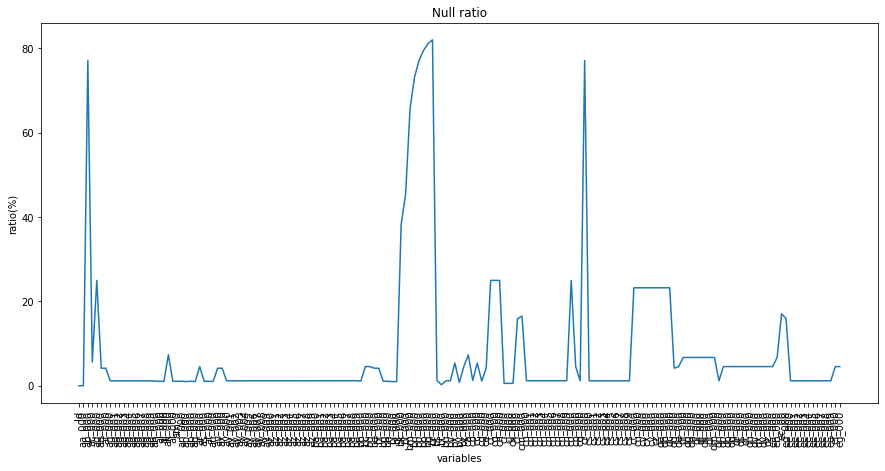

In [9]:
df = x_train
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)

percent_missing = df.isnull().sum() * 100 / len(df)

plt.figure(figsize=(15,7))
plt.plot(percent_missing)
plt.xlabel("variables")
plt.ylabel("ratio(%)")
plt.xticks(rotation=90, fontsize=10)
plt.title("Null ratio")

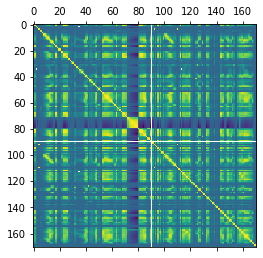

In [10]:
plt.matshow(x_train.corr())
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class values - neg:39178 / pos:722')

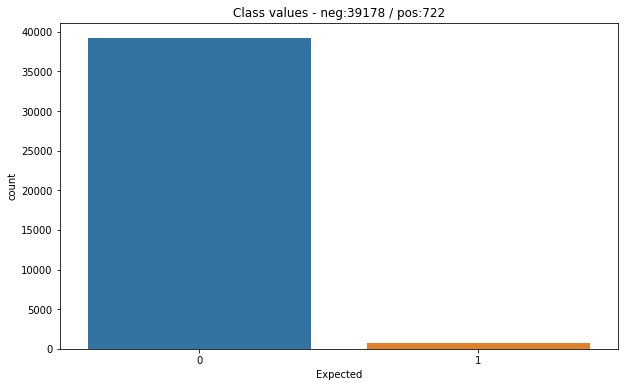

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(y_train["Expected"])
plt.title("Class values - neg:{0} / pos:{1}".format(y_train["Expected"].value_counts()[0], y_train["Expected"].value_counts()[1]))

checking for std=0 columns

In [12]:
column_to_remove = ''
for i in x_train:
    if x_train[i].std() == 0:
        #x_train = x_train.drop([i],axis=1) #dropping this column degrades performance?!
        print(i)
        column_to_remove = i

cd_000
